<a href="https://colab.research.google.com/github/Sardaar2003/GFG_Data_Science_Course_Assignment/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv('multiple_linear_regression.csv')

In [3]:
data.head()

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature 1  200 non-null    float64
 1   Feature 2  200 non-null    float64
 2   Feature 3  200 non-null    float64
 3   Target     200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## Data PreProcessing

In [5]:
data.isnull().sum()

Feature 1    0
Feature 2    0
Feature 3    0
Target       0
dtype: int64

## Splitting the Data

In [6]:
output_col='Target'

In [7]:
x=data.iloc[:,data.columns!=output_col]

In [8]:
x

,Feature 1,Feature 2,Feature 3
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [9]:
y=data.loc[:,output_col]

In [10]:
data.shape

(200, 4)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.6,random_state=43)

## Multiple Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [15]:
lr.coef_

array([ 0.0452421 ,  0.18762474, -0.00778156])

In [16]:
lr.intercept_

3.4681991085867416

In [17]:
predict=lr.predict(x_test)

In [18]:
from sklearn.metrics import mean_squared_error

In [19]:
cost=mean_squared_error(y_test,predict)

In [20]:
cost

3.0139127002923782

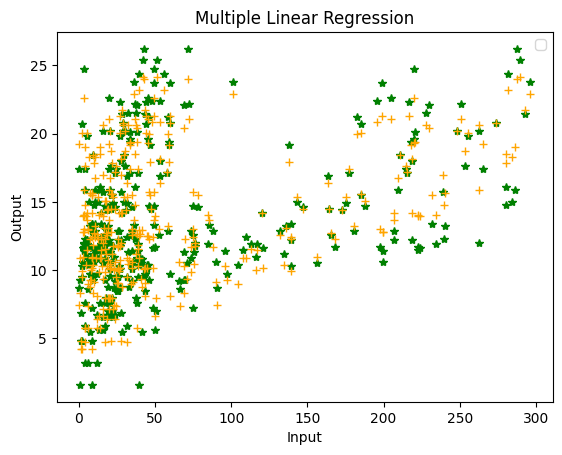

In [21]:
plt.plot(x_test,y_test,'*',color='green')
plt.plot(x_test,predict,'+',color='orange')
plt.title('Multiple Linear Regression')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()

## Homoscedasticity

In [22]:
residual=y_test-predict

In [23]:
residual

56    -3.248565
37    -1.060829
67     0.988389
79     1.018760
80     0.039253
         ...   
81    -2.499377
31     0.359665
59    -0.063272
166   -3.164641
103   -0.357046
Name: Target, Length: 120, dtype: float64

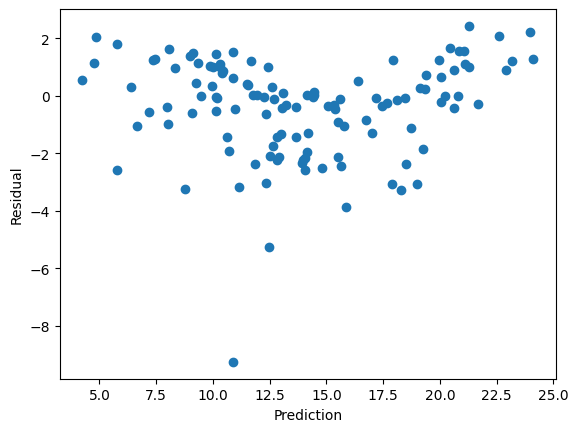

In [24]:
plt.scatter(predict,residual)
plt.xlabel('Prediction')
plt.ylabel('Residual')
plt.show()

## Normality

In [25]:
import seaborn as sns

<ipython-input-26-de15f7a7b687>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual)


<Axes: xlabel='Target', ylabel='Density'>

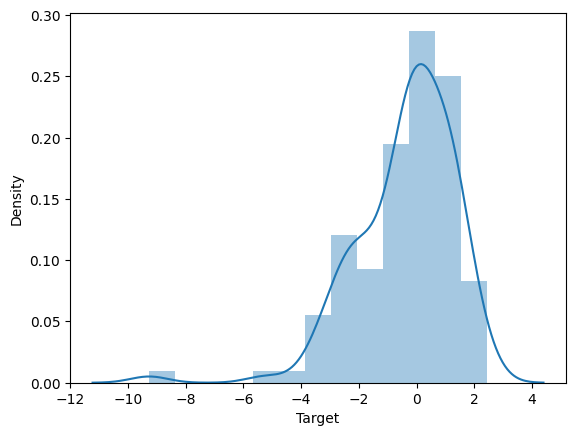

In [26]:
sns.distplot(residual)

## Ordinary Least Square Method

In [27]:
import statsmodels.api as sm

In [28]:
data.head()

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [29]:
x_with_cons=sm.add_constant(x_train)
x_with_cons

,const,Feature 1,Feature 2,Feature 3
63,1.0,102.7,29.6,8.4
78,1.0,5.4,29.9,9.4
108,1.0,13.1,0.4,25.6
124,1.0,229.5,32.3,74.2
194,1.0,149.7,35.6,6.0
...,...,...,...,...
58,1.0,210.8,49.6,37.7
21,1.0,237.4,5.1,23.5
49,1.0,66.9,11.7,36.8
64,1.0,131.1,42.8,28.9


In [30]:
model=sm.OLS(y_train,x_with_cons)

In [31]:
result=model.fit()

In [32]:
result.params

const        3.468199
Feature 1    0.045242
Feature 2    0.187625
Feature 3   -0.007782
dtype: float64

In [33]:
lr.coef_

array([ 0.0452421 ,  0.18762474, -0.00778156])

In [34]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     243.5
Date:                Thu, 31 Aug 2023   Prob (F-statistic):           7.03e-39
Time:                        05:33:56   Log-Likelihood:                -152.21
No. Observations:                  80   AIC:                             312.4
Df Residuals:                      76   BIC:                             321.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4682      0.496      6.998      0.0

In [35]:
data.head()

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
